In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import os


In [9]:
actions = [
    'hello',
    'bread_house',
    'lunch',
    'NOISE'
]
PATH = '/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/code/lstm'
data = np.concatenate([
    np.load(f'{PATH}/dataset/1704528330/seq_hello_(679, 30, 200).npy', allow_pickle=True),
    np.load(f'{PATH}/dataset/1704528330/seq_bread_house_(710, 30, 200).npy', allow_pickle=True),
    np.load(f'{PATH}/dataset/1704528330/seq_lunch_(638, 30, 200).npy', allow_pickle=True),
    np.load(f'{PATH}/dataset/1704528330/seq_NOISE_(691, 30, 200).npy', allow_pickle=True)
], axis=0)
# G:\내 드라이브\Sign_Remaster\Sign_Language_Remaster\code\lstm\dataset\1704116245\seq_lunch_200.npy
data.shape

(2718, 30, 200)

In [10]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2718, 30, 199)
(2718,)


In [11]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2718, 4)

In [12]:
from sklearn.model_selection import train_test_split

# data를 train과 test로 나눔
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# x_train, x_test, y_train, y_test의 크기 확인
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (2174, 30, 199)
y_train shape: (2174, 4)
x_test shape: (544, 30, 199)
y_test shape: (544, 4)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='tanh', input_shape=x_train.shape[1:3]),
    Dense(32, activation='tanh'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                67584     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 69796 (272.64 KB)
Trainable params: 69796 (272.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    shuffle = False,
    # callbacks=[
    #     ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
    #     ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    # ]
)

Epoch 1/100
68/68 [==============================] - 4s 16ms/step - loss: 0.4780 - acc: 0.8459 - val_loss: 0.1988 - val_acc: 0.9596
Epoch 2/100
68/68 [==============================] - 0s 6ms/step - loss: 0.1534 - acc: 0.9655 - val_loss: 0.1253 - val_acc: 0.9706
Epoch 3/100
68/68 [==============================] - 0s 6ms/step - loss: 0.1044 - acc: 0.9775 - val_loss: 0.0913 - val_acc: 0.9816
Epoch 4/100
68/68 [==============================] - 0s 6ms/step - loss: 0.0879 - acc: 0.9775 - val_loss: 0.0876 - val_acc: 0.9761
Epoch 5/100
68/68 [==============================] - 0s 6ms/step - loss: 0.0824 - acc: 0.9770 - val_loss: 0.0926 - val_acc: 0.9743
Epoch 6/100
68/68 [==============================] - 0s 6ms/step - loss: 0.0794 - acc: 0.9784 - val_loss: 0.0784 - val_acc: 0.9798
Epoch 7/100
68/68 [==============================] - 0s 6ms/step - loss: 0.0745 - acc: 0.9761 - val_loss: 0.0750 - val_acc: 0.9798
Epoch 8/100
68/68 [==============================] - 1s 8ms/step - loss: 0.0676 - 

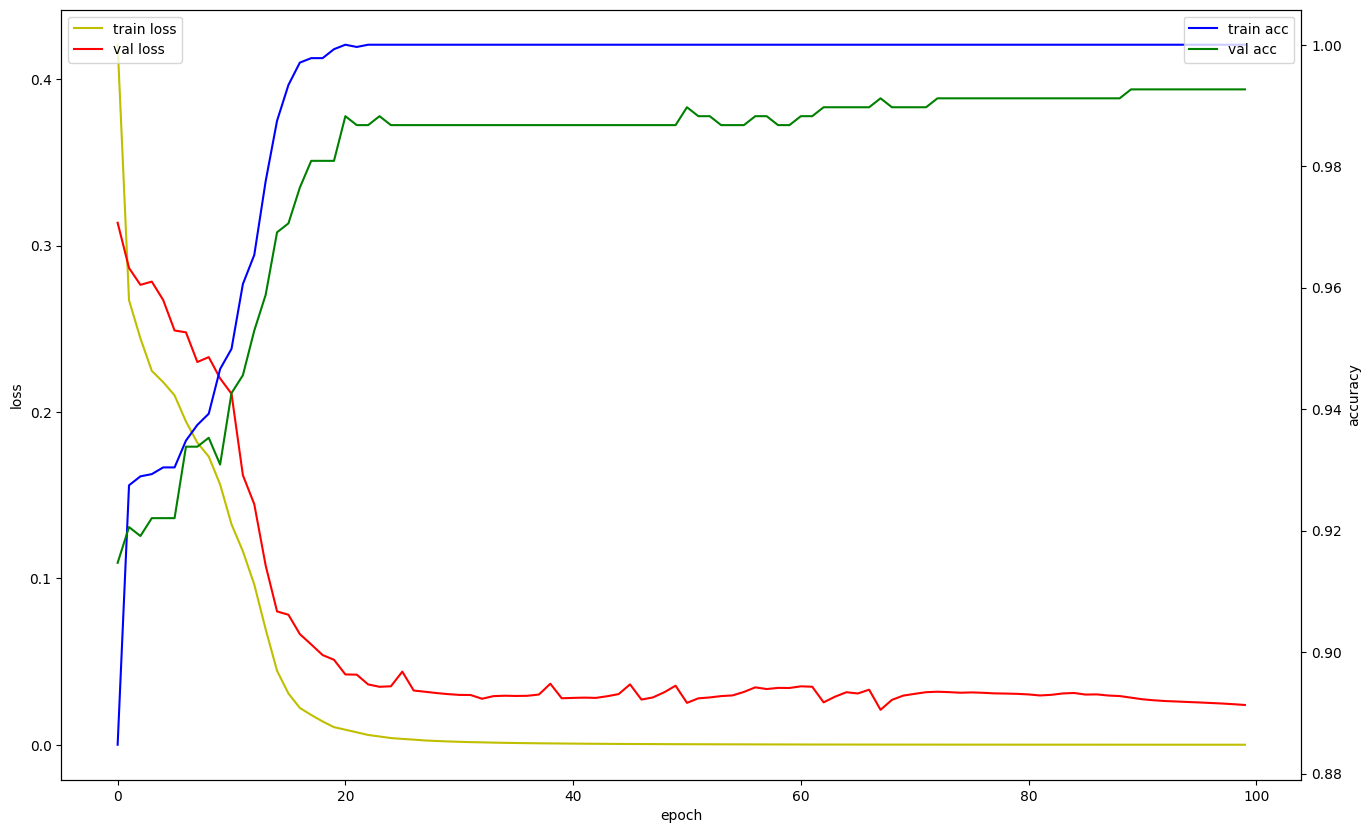

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [ ]:
model.save(f'/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/model/lstm_test9_e100.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score
# model = load_model(f'/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/model/lstm_test8_e100.h5')
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)


22/22 [==============================] - 1s 3ms/step
Accuracy: 0.9926470588235294


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

# model = load_model(f'/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/model/lstm_test8_e100.h5')

y_pred = model.predict(x_test)

multilabel_confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

22/22 [==============================] - 0s 3ms/step


array([[[275,   4],
        [  0, 401]],

       [[428,   0],
        [  0, 252]],

       [[661,   1],
        [  4,  14]],

       [[671,   0],
        [  1,   8]]])

# test

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

actions = [
    'hello',
    'bread_house',
    'lunch',
    'NOISE'
]
seq_length = 30

model = load_model(r"C:\PlayData\lstm_test8_e100.h5")

In [ ]:
model.input_shape

(None, 30, 199)

In [ ]:

import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

actions = [
    'hello',
    'bread_house',
    'lunch',
    'NOISE'
]
seq_length = 30

# model = load_model('G:\내 드라이브\Sign_Remaster\Sign_Language_Remaster\model\lstm_test1.h5')

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)

# w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# out = cv2.VideoWriter('input.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (w, h))
# out2 = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (w, h))

seq = []
action_seq = []

while cap.isOpened():
    ret, img = cap.read()
    img0 = img.copy()

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if result.multi_hand_landmarks is not None:
        dd = []
        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 4))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z, lm.visibility]

            # Compute angles between joints
            v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19], :3] # Parent joint
            v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], :3] # Child joint
            v = v2 - v1 # [20, 3]
            # Normalize v
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            # Get angle using arcos of dot product
            angle = np.arccos(np.einsum('nt,nt->n',
                v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18],:],
                v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19],:])) # [15,]

            angle = np.degrees(angle) # Convert radian to degree

            d = np.concatenate([joint.flatten(), angle])
            dd.append(d)
            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)
        if len(dd) == 1:
            dd.append(np.zeros_like(dd[0]))

        seq.append(dd)
        if len(seq) < seq_length:
            continue

        input_data = np.expand_dims(np.array(seq[-seq_length:], dtype=np.float32), axis=0)
        print(input_data.shape)
    #     y_pred = model.predict(input_data).squeeze()

    #     i_pred = int(np.argmax(y_pred))
    #     conf = y_pred[i_pred]

    #     if conf < 0.9:
    #         continue

    #     action = actions[i_pred]
    #     action_seq.append(action)

    #     if len(action_seq) < 3:
    #         continue

    #     this_action = '?'
    #     if action_seq[-1] == action_seq[-2] == action_seq[-3]:
    #         this_action = action

    #     cv2.putText(img, f'{this_action.upper()}', org=(int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0] + 20)), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

    # # out.write(img0)
    # # out2.write(img)
    # cv2.imshow('img', img)
    if cv2.waitKey(1) == ord('q'):
        cv2.destroyAllWindows()
        break


(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2, 99)
(1, 30, 2,

KeyboardInterrupt: 